In [2]:
import numpy as np
from UCB_discrete import UCB_discrete, UCB_os_gau, UCB_os_exp, UCB1_os, UCB_os_comb, UCB_clinical, UCB1_os_clinical
from collections import defaultdict
import Environment
from Environment import AbsGau, Exp, Comb, AbsGau_Outlier, Exp_Outlier, Clinical_env
from SimulatedGames import simulate
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
import pickle
import plots

%matplotlib inline

### Experiment Log

This notebook is used to log in the settings of each experiment and show results respectively. 

In [3]:
# Exper1: results recorded in os_saving_1.pickle

# setting

num_rounds = 10000
num_exper = 50
num_arms = 3

# environment

environments = {AbsGau: [0.5, 1, 1.5], 
                Exp: [0.5, 1, 1.5],
                Comb: [0.5, 1, 1.5], 
                AbsGau_Outlier: [0.5, 1, 1.5]
               }

rewards_env, medians = Environment.setup_env(num_arms, environments)

# policy

policy = {'AbsGau': UCB_os_gau,
          'Exp': UCB_os_exp,
          'Comb': UCB_os_comb,
          'AbsGau_Outlier': UCB_os_gau
         }
# hyper-parameters for policy

hyperpara_list = [[1, 0.2]]

evaluation = ['sd', 'r', 'bd']

In [5]:
medians

defaultdict(list,
            {'AbsGau': [0.33400065715147054,
              0.6788013279208175,
              1.0101437605644428],
             'Exp': [0.3500283179708765, 0.692233217038012, 1.043945554600994],
             'Comb': [0.3373148327366885,
              0.676979807865308,
              1.079321139239696],
             'AbsGau_Outlier': [0.36062638047870943,
              0.7064013413373704,
              1.062850490815789]})

In [7]:
with open('os_saving_1.pickle', 'rb') as handle:
    os_saving_1 = pickle.load(handle)

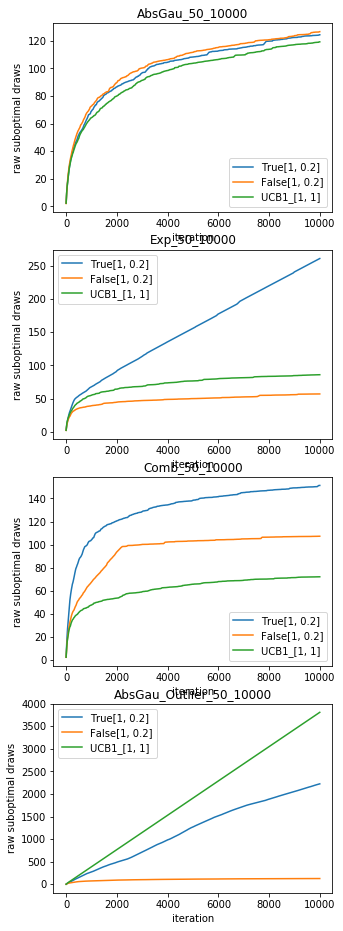

In [8]:
plots.plot_eva(os_saving_1, 'sd', 'raw')

from experiment shows unexpected bad performance compared with the previous experiment  
figure out why (bugs? para setting? est var?)  
find out the situation our policy performance good (by tuning paras, setting para, introduce outliers)

From [hyperparameter tuning for Exp](https://github.com/chengsoonong/eheye/blob/b89cbbf92ba493fffdc0346c084f660aa445ffa7/QuantUCB/ucb_os_hyperparameter_tuning_outliers_testing.ipynb), we can see the policy with true variance beats UCB1 with probable parameters, which is consistent to our result shown in the above. However, if we look at estimate variance, the performances is much worse. 

Experiemnt shows to estimate the paramters precisely, we need around 1000 samples, which is impossible for bandit settings. Under the current policy, the gap between estimated para and true para can be larger than 3 (when paras are around 0.5 - 2), which definitely misleading how we choose arms. It is even worse than set L into one fixed number. 

Some ideas
1. UCB-V paper also uses the empirical vairiance (although their policy is directly based on empirical variance), they must face the same problem (although they didn't provide any performance plots in the paper). Have a look at their paper. 
2. figure out how to estimate hazard rate

### Outliers

In [3]:
# setting

num_rounds = 5000
num_exper = 50
num_arms = 3

# environment

environments = {#AbsGau: [0.7, 0.8, 0.9], 
                #Exp: [1,2,3],
                #Comb: [0.7, 0.7, 1], 
                AbsGau_Outlier: [0.5, 1, 1.5]
               }

rewards_env, medians = Environment.setup_env(num_arms, environments)

# policy

policy = {'AbsGau': UCB_os_gau,
          'Exp': UCB_os_exp,
          'Comb': UCB_os_comb,
          'AbsGau_Outlier': UCB_os_gau
         }
# hyper-parameters for policy

hyperpara_list = [[0.5, 0.2]]

evaluation = ['sd', 'r', 'bd']


# for UCB1

hyperpara_list = [[0.2, 1], [0.5, 1], [1,1]]

In [4]:
medians

defaultdict(list,
            {'AbsGau_Outlier': [0.35228787539516127,
              0.71372962120794,
              1.0576152808093648]})

In [5]:
with open('os_saving_2.pickle', 'rb') as handle:
    b = pickle.load(handle)

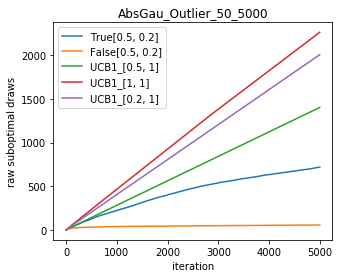

In [6]:
plots.plot_eva(b, 'sd', 'raw')

### AbsGau, Exp vs. UCB1

In [5]:
# setting

num_rounds = 10000
num_exper = 50
num_arms = 3

# environment

environments = {AbsGau: [0.5, 1, 1.5], 
                Exp: [2.0, 1, 3.0/2],
                #Comb: [0.7, 0.7, 1], 
                #AbsGau_Outlier: [0.5, 1, 1.5]
               }

rewards_env, medians = Environment.setup_env(num_arms, environments)

# policy

policy = {'AbsGau': UCB_discrete, #UCB_os_gau,
          'Exp': UCB_discrete, #UCB_os_exp,
          'Comb': UCB_os_comb,
          'AbsGau_Outlier': UCB_os_gau
         }
# hyper-parameters for policy

hyperpara_list = [[1, 0.2], [0.5, 0.2]]

evaluation = ['sd', 'r', 'bd']

# For UCB1, tried 0.5,1,1.5, 1 gives the best performance

hyperpara_list = [[1]]
est_var = False

In [6]:
medians

defaultdict(list,
            {'AbsGau': [0.33950521965308933,
              0.6840413927703435,
              1.0193934144948593],
             'Exp': [0.3401980523712693,
              0.6922250420577905,
              0.46266441402206193]})

In [10]:
with open('os_saving_3.pickle', 'rb') as handle:
    c = pickle.load(handle)

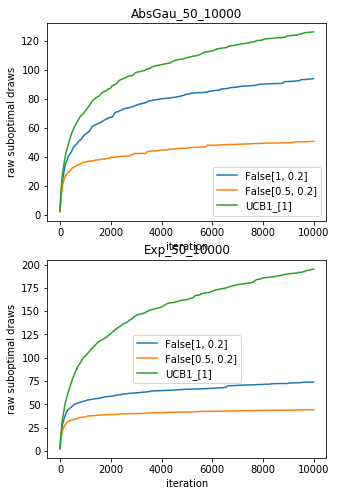

In [10]:
plots.plot_eva(c, 'sd', 'raw')

### AbsGau_Outlier, Exp_Outlier vs. UCB1

In [2]:
# setting

num_rounds = 10000
num_exper = 50
num_arms = 3

# environment

environments = {#AbsGau: [0.5, 1, 1.5], 
                #Exp: [2.0, 1, 3.0/2],
                #Comb: [0.7, 0.7, 1], 
                AbsGau_Outlier: [0.5, 1, 1.5],
                Exp_Outlier: [2.0, 1, 3.0/2]
               }

rewards_env, medians = Environment.setup_env(num_arms, environments)

# policy

policy = {'AbsGau': UCB_discrete, #UCB_os_gau,
          'Exp': UCB_discrete, #UCB_os_exp,
          'Comb': UCB_os_comb,
          'AbsGau_Outlier': UCB_discrete, #UCB_os_gau
          'Exp_Outlier': UCB_discrete
         }
# hyper-parameters for policy

hyperpara_list = [[1, 0.2], [0.5, 0.2]]

evaluation = ['sd', 'r', 'bd']

# for ucb1

hyperpara_list = [[1]]
est_var = False

In [4]:
medians

defaultdict(list,
            {'AbsGau_Outlier': [0.3655963723364252,
              0.7119098137097299,
              1.0758478208398254],
             'Exp_Outlier': [0.37002613386341143,
              0.7413024865310384,
              0.49552048977141055]})

In [6]:
with open('os_saving_4.pickle', 'rb') as handle:
    d = pickle.load(handle)

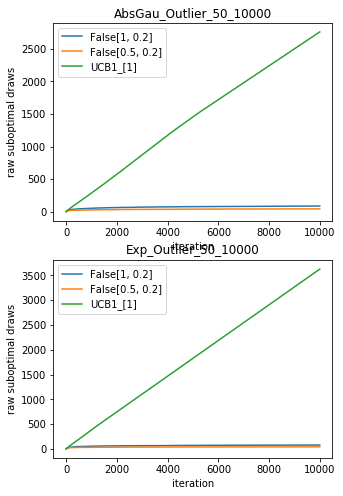

In [9]:
plots.plot_eva(d, 'sd', 'raw')

In [15]:
for key, value in c.items():
    d[key] = value

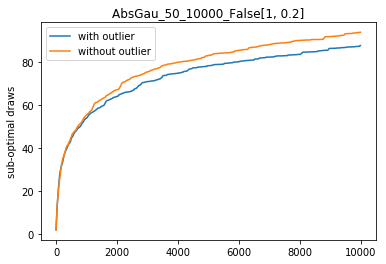

In [24]:

plt.plot(d['AbsGau_Outlier_50_10000']['False[1, 0.2]']['sd'], label = 'with outlier')
plt.plot(d['AbsGau_50_10000']['False[1, 0.2]']['sd'], label = 'without outlier')
plt.title('AbsGau_50_10000_False[1, 0.2]')
plt.ylabel('sub-optimal draws')
plt.legend()

### Combs

In [2]:
# setting

num_rounds = 10000
num_exper = 50
num_arms = 3

# environment

environments = [
                #{AbsGau: [0.5, 1.0, 1.5]}, 
                #{Exp:    [2.0, 1.0, 1.5]},
                #{AbsGau_Outlier: [0.5, 1, 1.5]},
                #{Exp_Outlier: [2.0, 1, 3.0/2]},
                {AbsGau: [0.5], Exp: [1.0, 1.5]},
                {AbsGau_Outlier: [0.5], Exp_Outlier: [1.0, 1.5]}
               ]

rewards_env, medians = Environment.setup_env(num_arms, environments)

# policy

policy = UCB_discrete

# hyper-parameters for policy

hyperpara_list = [[1, 0.2], [0.5, 0.2]]

evaluation = ['sd', 'r', 'bd']

In [3]:
medians

defaultdict(list,
            {'AbsGau_[0.5]Exp_[1.0, 1.5]': [0.34157554647521127,
              0.7007045764044109,
              0.48425727819859987],
             'AbsGau_Outlier_[0.5]Exp_Outlier_[1.0, 1.5]': [0.3562271017002436,
              0.7496890627291659,
              0.47622280325391486]})

In [4]:
with open('os_saving_5.pickle', 'rb') as handle:
    e = pickle.load(handle)

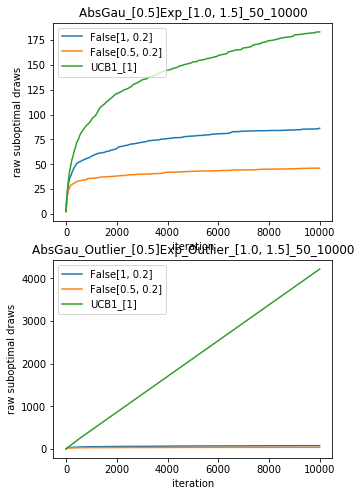

In [6]:
plots.plot_eva(e, 'sd', 'raw')

In [9]:
e.keys()

dict_keys(['AbsGau_[0.5]Exp_[1.0, 1.5]_50_10000', 'AbsGau_Outlier_[0.5]Exp_Outlier_[1.0, 1.5]_50_10000'])

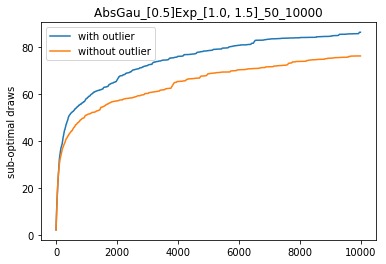

In [11]:

plt.plot(e['AbsGau_[0.5]Exp_[1.0, 1.5]_50_10000']['False[1, 0.2]']['sd'], label = 'with outlier')
plt.plot(e['AbsGau_Outlier_[0.5]Exp_Outlier_[1.0, 1.5]_50_10000']['False[1, 0.2]']['sd'], label = 'without outlier')
plt.title('AbsGau_[0.5]Exp_[1.0, 1.5]_50_10000')
plt.ylabel('sub-optimal draws')
plt.legend()

In [12]:
# setting

num_rounds = 1000
num_exper = 100
num_arms = 3

# environment

environments = [
                {AbsGau: [0.5, 1.0, 1.5]}, 
                {Exp:    [2.0, 1.0, 1.5]},
                {AbsGau_Outlier: [0.5, 1, 1.5]},
                {Exp_Outlier: [2.0, 1, 1.5]},
                {AbsGau: [0.5], Exp: [1.0, 1.5]},
                {AbsGau_Outlier: [0.5], Exp_Outlier: [1.0, 1.5]}
               ]

rewards_env, medians = Environment.setup_env(num_arms, environments)


policy = UCB_discrete

# hyper-parameters for policy

hyperpara_list = [[0.5, 0.2]]

evaluation = ['sd', 'r', 'bd']

In [13]:
medians

defaultdict(list,
            {'AbsGau_[0.5, 1.0, 1.5]': [0.33670043653080195,
              0.6673031442503854,
              1.001722858845818],
             'Exp_[2.0, 1.0, 1.5]': [0.34894492927247733,
              0.6992320911441782,
              0.45885751302168915],
             'AbsGau_Outlier_[0.5, 1, 1.5]': [0.35481225657211346,
              0.7034264402035013,
              1.0897566135237364],
             'Exp_Outlier_[2.0, 1, 1.5]': [0.37692343288176544,
              0.7309041907655296,
              0.5116919306612722],
             'AbsGau_[0.5]Exp_[1.0, 1.5]': [0.33844131845569886,
              0.7146778931191466,
              0.4559404858592383],
             'AbsGau_Outlier_[0.5]Exp_Outlier_[1.0, 1.5]': [0.36098019093088984,
              0.739601478026316,
              0.49192159744991826]})

In [2]:
with open('os_saving_6.pickle', 'rb') as handle:
    f = pickle.load(handle)

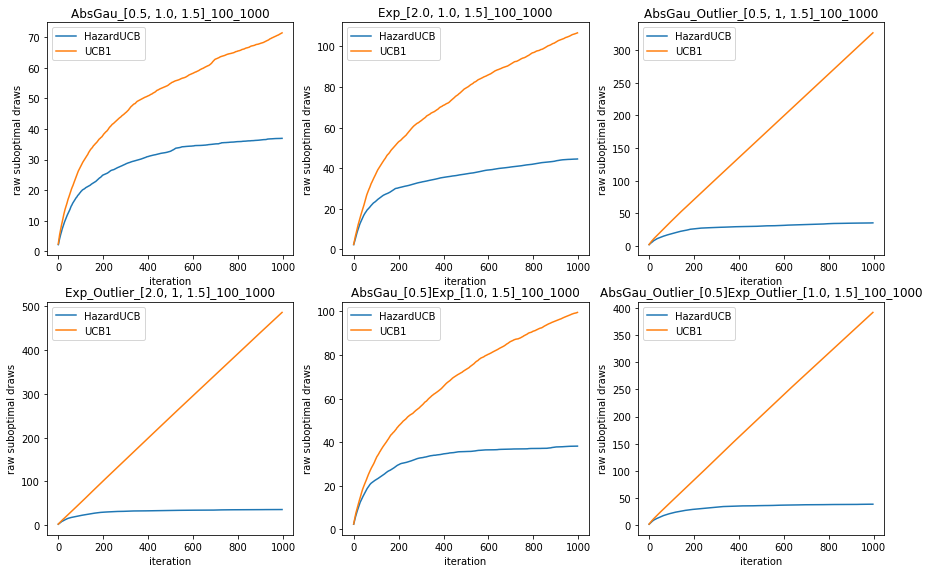

In [3]:
plots.plot_eva(f, 'sd', 'raw')

### Application: clinical dataset 

https://github.com/chengsoonong/eheye/blob/master/UCB/OS_UCB/clinical%20data%20test.ipynb

In [ ]:
# setting

num_rounds = 300
num_exper = 1000
num_arms = 2

# environment

clinical_envs = defaultdict(list)
medians = defaultdict(list)

clinical_envs['radiation'] = [Clinical_env(days_to_death_with_radiation),
                              Clinical_env(days_to_death_without_radiation)
                             ]

medians['radiation'] = [np.median(days_to_death_with_radiation),
                        np.median(days_to_death_without_radiation)
                       ]

policy = UCB_clinical

# hyper-parameters for policy

hyperpara_list = [[4, 1]]

evaluation = ['sd', 'r', 'bd']

In [6]:
with open('os_saving_7.pickle', 'rb') as handle:
    g = pickle.load(handle)

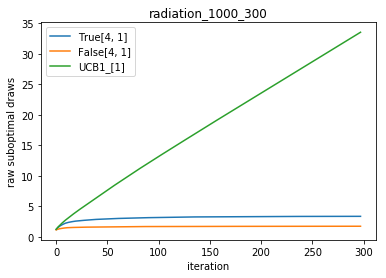

In [8]:
plots.plot_eva(g, 'sd', 'raw', compare_flag = True)

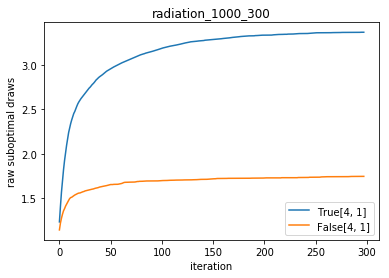

In [9]:
plots.plot_eva(g, 'sd', 'raw', compare_flag = False)

### Setting bigger median gaps

In [2]:
# setting

num_rounds = 1000
num_exper = 100
num_arms = 3

# environment

'''
environments = {#AbsGau: [0.5, 1, 1.5], 
                #Exp: [2.0, 1, 3.0/2],
                #Comb: [0.7, 0.7, 1], 
                AbsGau_Outlier: [0.5, 1, 1.5],
                Exp_Outlier: [2.0, 1, 3.0/2]
               }
'''

environments = [
                {AbsGau: [5, 10, 15]}, 
                {Exp:    [0.2, 0.10, 0.15]},
                {AbsGau_Outlier: [5, 10, 15]},
                {Exp_Outlier: [0.2, 0.10, 0.15]},
                {AbsGau: [5], Exp: [0.10, 0.15]},
                {AbsGau_Outlier: [5], Exp_Outlier: [0.10, 0.15]}
               ]

rewards_env, medians = Environment.setup_env(num_arms, environments)

# policy
'''
policy = {'AbsGau': UCB_discrete, #UCB_os_gau,
          'Exp': UCB_discrete, #UCB_os_exp,
          'Comb': UCB_discrete,     #UCB_os_comb,
          'AbsGau_Outlier': UCB_discrete, #UCB_os_gau
          'Exp_Outlier': UCB_discrete
         }
'''
policy = UCB_discrete

# hyper-parameters for policy

hyperpara_list = [[0.5, 0.2], [2, 0.5]]

evaluation = ['sd', 'r', 'bd']

In [3]:
medians

defaultdict(list,
            {'AbsGau_[5, 10, 15]': [3.378707517381184,
              6.692897151668149,
              9.97609835856883],
             'Exp_[0.2, 0.1, 0.15]': [3.4595054144023623,
              6.8997689546779775,
              4.697882465437479],
             'AbsGau_Outlier_[5, 10, 15]': [3.483881333534054,
              7.171275308773358,
              10.737648756903331],
             'Exp_Outlier_[0.2, 0.1, 0.15]': [3.7506110436717437,
              7.308241131550211,
              4.877255306313874],
             'AbsGau_[5]Exp_[0.1, 0.15]': [3.4178906230677573,
              6.915361726151099,
              4.553303821500446],
             'AbsGau_Outlier_[5]Exp_Outlier_[0.1, 0.15]': [3.597716009516721,
              7.481732752175544,
              4.992795788850925]})

In [4]:
with open('os_saving_8.pickle', 'rb') as handle:
    h = pickle.load(handle)

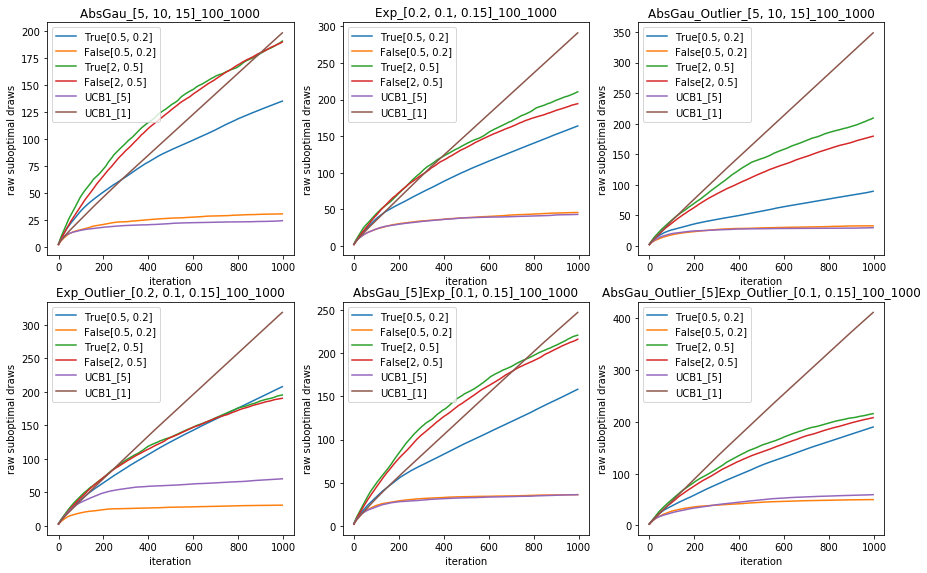

In [6]:
plots.plot_eva(h, 'sd', 'raw')

It seems that when the parameters are not fine-tuned (2, 0.5), then the gap between true and esitmated L makes small differences, but when parameters are tuned, then (0.5, 0.2), the gap is big although the estimated L still get better result compared with (2, 0.5).

UCB seems to achieve a reasonable good performance when using parameter 5, even through there are outliers. 

We have reason to believe that when continue to tune parameters, a better results can be achieved by both of the algorithms. However, the key point is to figure how the gap of medians and how different parameters influence the performance. 

### Different groups (small, medium, big median differences)

In [3]:
# setting

num_rounds = 1000
num_exper = 100
num_arms = 3

# environment

'''
environments = {#AbsGau: [0.5, 1, 1.5], 
                #Exp: [2.0, 1, 3.0/2],
                #Comb: [0.7, 0.7, 1], 
                AbsGau_Outlier: [0.5, 1, 1.5],
                Exp_Outlier: [2.0, 1, 3.0/2]
               }
'''

Group_small = [
    {AbsGau: [0.5, 0.1, 1.5]}, 
    {Exp:    [2, 1, 1.5]},
    {AbsGau_Outlier: [0.5, 0.1, 1.5]},
    {Exp_Outlier: [2, 1, 1.5]},
    {AbsGau: [0.5], Exp: [1, 1.5]},
    {AbsGau_Outlier: [0.5], Exp_Outlier: [1, 1.5]},
]

Group_medium = [
    {AbsGau: [5, 10, 15]}, 
    {Exp:    [0.2, 0.10, 0.15]},
    {AbsGau_Outlier: [5, 10, 15]},
    {Exp_Outlier: [0.2, 0.10, 0.15]},
    {AbsGau: [5], Exp: [0.10, 0.15]},
    {AbsGau_Outlier: [5], Exp_Outlier: [0.10, 0.15]}
]

Group_big = [
    {AbsGau: [50, 100, 150]}, 
    {Exp:    [0.02, 0.010, 0.015]},
    {AbsGau_Outlier: [50, 100, 150]},
    {Exp_Outlier: [0.02, 0.010, 0.015]},
    {AbsGau: [50], Exp: [0.010, 0.015]},
    {AbsGau_Outlier: [50], Exp_Outlier: [0.010, 0.015]}
]

environments = Group_small + Group_medium + Group_big

rewards_env, medians, samples = Environment.setup_env(num_arms, environments)

# policy
'''
policy = {'AbsGau': UCB_discrete, #UCB_os_gau,
          'Exp': UCB_discrete, #UCB_os_exp,
          'Comb': UCB_discrete,     #UCB_os_comb,
          'AbsGau_Outlier': UCB_discrete, #UCB_os_gau
          'Exp_Outlier': UCB_discrete
         }
'''
policy = UCB_discrete

# hyper-parameters for policy

hyperpara_list = [[0.5, 0.2], [2, 0.5], [4, 1]]

evaluation = ['sd', 'r', 'bd']

# ucb

hyperpara_list = [[1], [5], [10]]

In [4]:
medians

defaultdict(list,
            {'AbsGau_[0.5, 0.1, 1.5]': [0.33483799672981995,
              0.06718499271695624,
              1.0120829173688235],
             'Exp_[2, 1, 1.5]': [0.35031491198651155,
              0.6769560764328983,
              0.4690443174043942],
             'AbsGau_Outlier_[0.5, 0.1, 1.5]': [0.36315281073987626,
              0.07104907617573969,
              1.0816564274146705],
             'Exp_Outlier_[2, 1, 1.5]': [0.3707587830526368,
              0.7544529325349774,
              0.4966151977474218],
             'AbsGau_[0.5]Exp_[1, 1.5]': [0.33341139836230926,
              0.6908148680392039,
              0.47059305828604125],
             'AbsGau_Outlier_[0.5]Exp_Outlier_[1, 1.5]': [0.35468437217949544,
              0.7508632967004036,
              0.5032097968462407],
             'AbsGau_[5, 10, 15]': [3.3403004604016675,
              6.700484927224322,
              10.002888621880885],
             'Exp_[0.2, 0.1, 0.15]': [3.45692636267559

In [5]:
with open('os_saving_9.pickle', 'rb') as handle:
    i = pickle.load(handle)

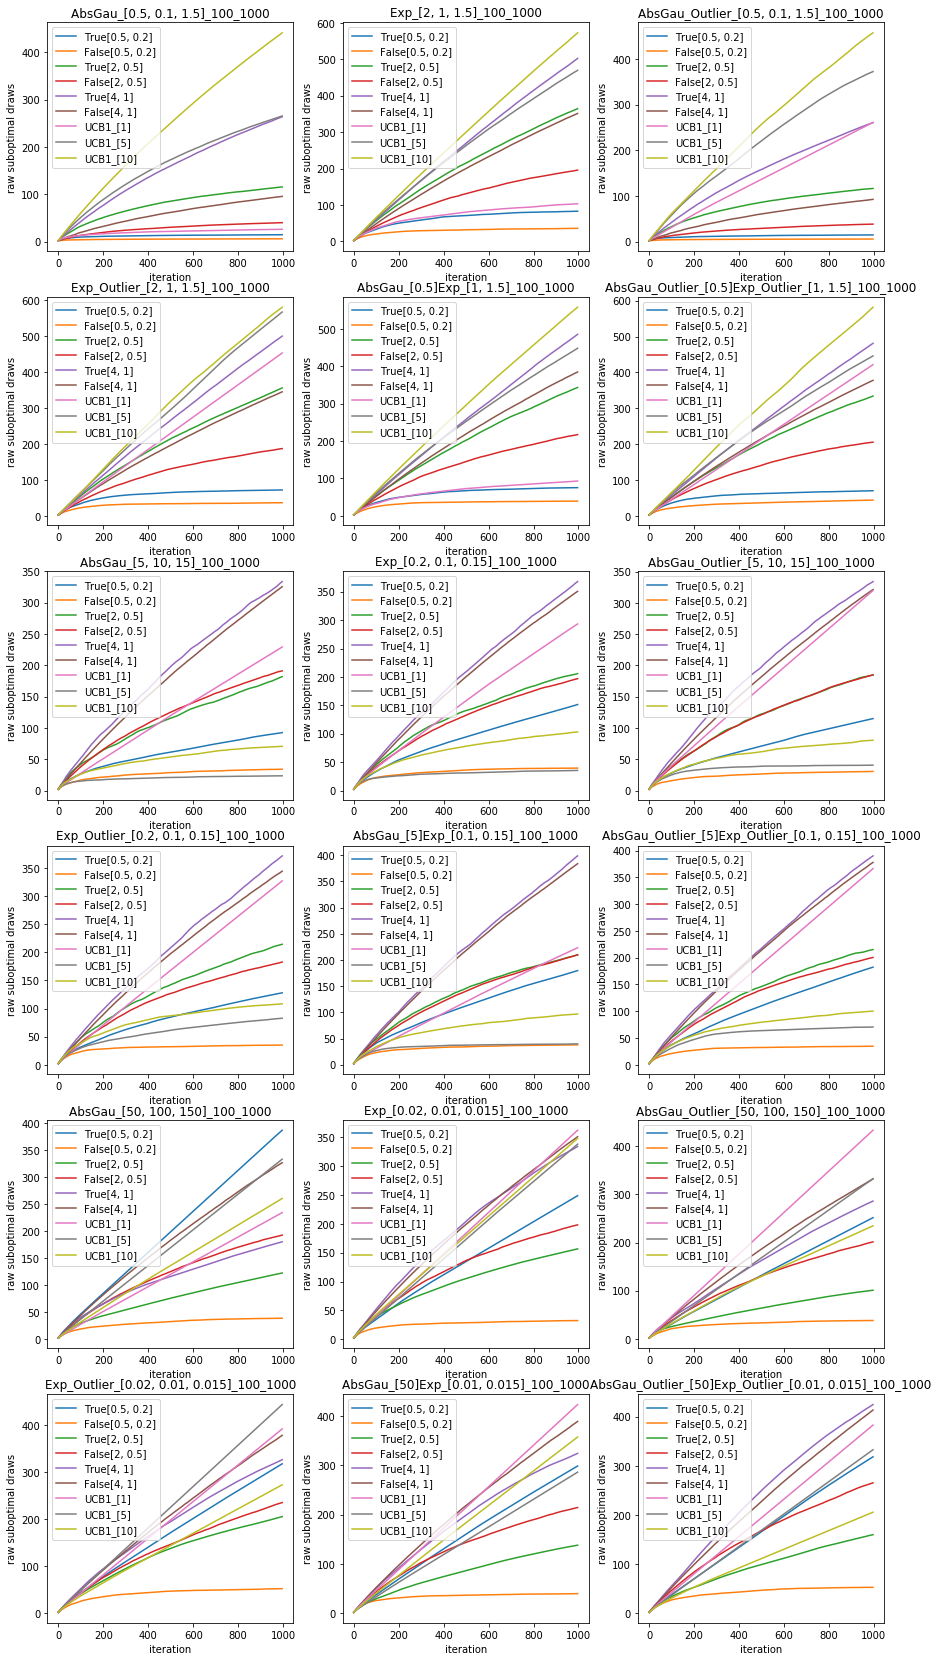

In [7]:
plots.plot_eva(i, 'sd', 'raw')